## implementation of ORB Algorithm and some of it's features 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

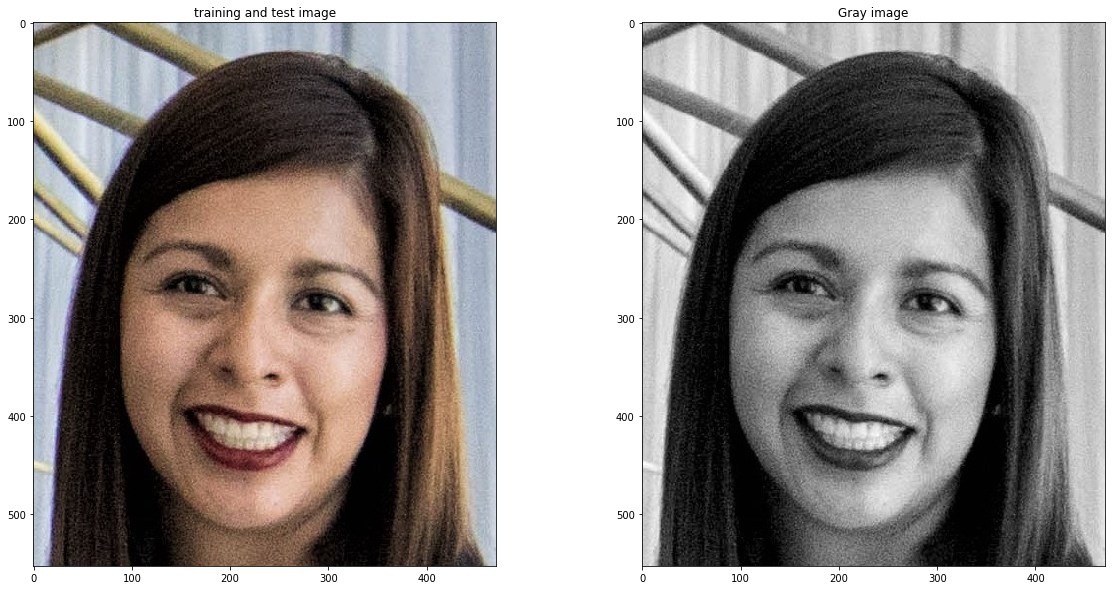

In [2]:
plt.rcParams['figure.figsize'] = [20,10]

# load face images (train and test)
train = cv2.imread('images/face.jpeg')
test = cv2.imread('images/face.jpeg')

#convert them to RGB
train = cv2.cvtColor(train,cv2.COLOR_BGR2RGB)
test = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)

#get gray copy of images
train_gray = cv2.cvtColor(train,cv2.COLOR_RGB2GRAY)
test_gray = cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)


#plot images (I used the same image to just test my code)
plt.subplot(121)
plt.title("training and test image")
plt.imshow(train)

plt.subplot(122)
plt.title('Gray image')
plt.imshow(train_gray , cmap='gray')

## now we create ORB
All features of it is : 

cv2.ORB_create(nfeatures = 500,
               scaleFactor = 1.2,
		       nlevels = 8,
		       edgeThreshold = 31,
		       firstLevel = 0,
		       WTA_K = 2,
		       scoreType = HARRIS_SCORE,
		       patchSize = 31,
		       fastThreshold = 20)`
    
Parameters:

* **nfeatures** - *int*  
Determines the maximum number of features (keypoints) to locate.


* **scaleFactor** - *float*  
Pyramid decimation ratio, must be greater than 1. ORB uses an image pyramid to find features, therefore you must provide the scale factor between each layer in the pyramid and the number of levels the pyramid has. A `scaleFactor = 2` means the classical pyramid, where each next level has 4x less pixels than the previous. A big scale factor will diminish the number of features found.


* **nlevels** - *int*  
The number of pyramid levels. The smallest level will have a linear size equal to input_image_linear_size/pow(scaleFactor, nlevels).


* **edgeThreshold** - - *int*  
The size of the border where features are not detected. Since the keypoints have a specific pixel size, the edges of images must be excluded from the search. The size of the `edgeThreshold` should be equal to or greater than the patchSize parameter.


* **firstLevel** - *int*  
This parameter allows you to determine which level should be treated as the first level in the pyramid. It should be 0 in the current implementation. Usually, the pyramid level with a scale of unity is considered the first level.


* **WTA_K** - *int*  
The number of random pixels used to produce each element of the oriented BRIEF descriptor. The possible values are 2, 3, and 4, with 2 being the default value. For example, a value of 3 means three random pixels are chosen at a time to compare their brightness. The index of the brightest pixel is returned. Since there are 3 pixels, the returned index will be either 0, 1, or 2.


* **scoreType** - *int*  
This parameter can be set to either HARRIS_SCORE or FAST_SCORE. The default HARRIS_SCORE means that the Harris corner algorithm is used to rank features. The score is used to only retain the best features. The FAST_SCORE produces slightly less stable keypoints, but it is a little faster to compute.


* **patchSize** - *int*  
Size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered by a feature will be larger.

In [17]:
orb = cv2.ORB_create(1000,2)

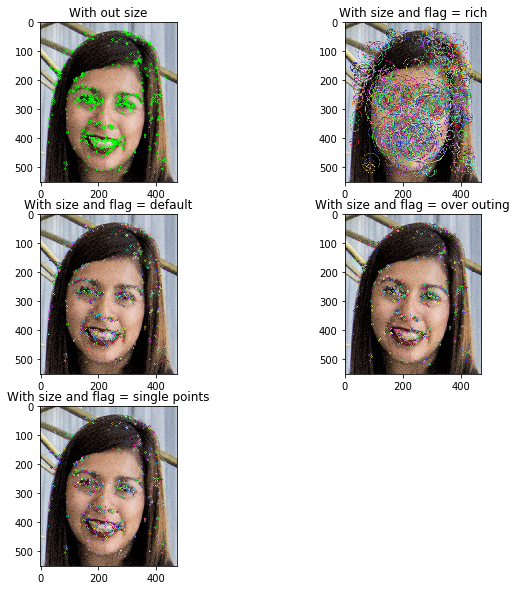

In [18]:
plt.rcParams['figure.figsize'] = [10,10]

keypoints , descriptor = orb.detectAndCompute(train_gray,None)
#plot detected keypoints one with size and orintation and one with them
keyWithOutSize = np.copy(train)
keyWithSize = np.copy(train)
keyWithSize2 = np.copy(train)
keyWithSize3 = np.copy(train)
keyWithSize4 = np.copy(train)


# I just want to know what the dif between flags 
cv2.drawKeypoints(train,keypoints,keyWithOutSize,(0,255,0))
cv2.drawKeypoints(train,keypoints,keyWithSize,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(train,keypoints,keyWithSize2,flags = cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(train,keypoints,keyWithSize3,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
cv2.drawKeypoints(train,keypoints,keyWithSize4,flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)



plt.subplot(321)
plt.title('With out size')
plt.imshow(keyWithOutSize)

plt.subplot(322)
plt.title('With size and flag = rich')
plt.imshow(keyWithSize)

plt.subplot(323)
plt.title('With size and flag = default')
plt.imshow(keyWithSize2)

plt.subplot(324)
plt.title('With size and flag = over outing')
plt.imshow(keyWithSize3)

plt.subplot(325)
plt.title('With size and flag = single points')
plt.imshow(keyWithSize4)



## Matching with test image

we do this with  `cv2.BFMatcher()`

`cv2.BFMatcher(normType = cv2.NORM_L2,
		 	  crossCheck = false)`

Parameters:

* **normType**  
Specifies the metric used to determine the quality of the match. By default, `normType = cv2.NORM_L2`, which measures the distance between two descriptors.  However, for binary descriptors like the ones created by ORB, the Hamming metric is more suitable. The Hamming metric determines the distance by counting the number of dissimilar bits between the binary descriptors. When the ORB descriptor is created using `WTA_K = 2`, two random pixels are chosen and compared in brightness. The index of the brightest pixel is returned as either 0 or 1.  Such output only occupies 1 bit, and therefore the ` cv2.NORM_HAMMING` metric should be used.  If, on the other hand, the ORB descriptor is created using `WTA_K = 3`, three random pixels are chosen and compared in brightness. The index of the brightest pixel is returned as either 0, 1, or 2.  Such output will occupy 2 bits, and therefore a special variant of the Hamming distance, known as the `cv2.NORM_HAMMING2` (the 2 stands for 2 bits), should be used instead. Then, for any metric chosen, when comparing the keypoints in the training and query images, the pair with the smaller metric (distance between them) is considered the best match.


* **crossCheck** - *bool* 
A Boolean variable and can be set to either `True` or `False`. Cross-checking is very useful for eliminating false matches. Cross-checking works by performing the matching procedure two times. The first time the keypoints in the training image are compared to those in the query image; the second time, however, the keypoints in the query image are compared to those in the training image (*i.e.* the comparison is done backwards). When cross-checking is enabled a match is considered valid only if keypoint *A* in the training image is the best match of keypoint *B* in the query image and vice-versa (that is, if keypoint *B* in the query image is the best match of point *A* in the training image). 

Once the parameters of the *BFMatcher* have been set, we can use the `.match(descriptors_train, descriptors_query)` method to find the matching  keypoints between the training and query images using their ORB descriptors. Finally, we will use the ` cv2.drawMatches ()` function to visualize the matching keypoints found by the Brute-Force matcher. This function stacks the training and query images horizontally and draws lines from the keypoints in the training image to their corresponding best matching keypoints in the query image. Remember that in order to see the properties of the ORB algorithm more clearly, in the following examples we will use the same image as our training and query image.    

number of keypoints in train image is : 819
number of test keypoints is : 819
number of matched keypoints is : 819


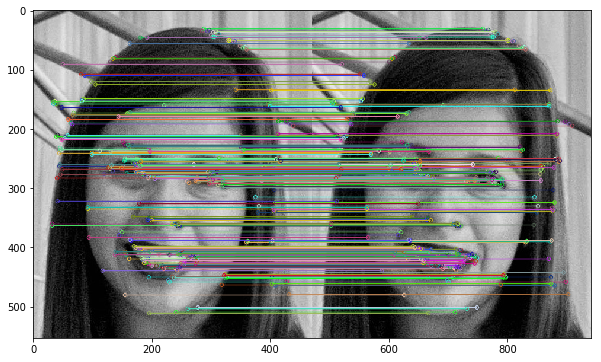

In [21]:
# find keypoints in test image
test_keypoints , test_descriptor = orb.detectAndCompute(test_gray,None)

# create matcher 
bf = cv2.BFMatcher(cv2.NORM_HAMMING,True)
matches = bf.match(descriptor,test_descriptor)
# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches , key= lambda x : x.distance)
# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
matched_img = cv2.drawMatches(train_gray,keypoints,test_gray,test_keypoints,matches[0:300],test_gray,flags=2)
print("number of keypoints in train image is : " + str(len(keypoints)) + "\nnumber of test keypoints is : " \
      + str(len(test_keypoints))+ "\nnumber of matched keypoints is : " + str(len(matches)))

plt.imshow(matched_img)

### now I will try some ORB's Main Properties

* Scale Invariance
* Rotational Invariance
* Illumination Invariance
* Noise Invariance

#### Scale Invariance

number of keypoints in train image is : 819
number of test keypoints is : 65
number of matched keypoints is : 65


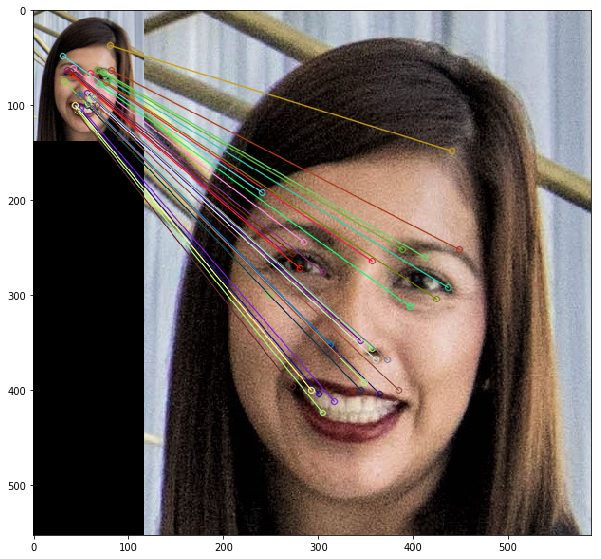

In [39]:
# load small test image
test_small = cv2.imread('images/faceQS.png')
test_small = cv2.cvtColor(test_small,cv2.COLOR_BGR2RGB)
test_small_gray = cv2.cvtColor(test_small,cv2.COLOR_BGR2GRAY)

small_keypoints , small_descriptor = orb.detectAndCompute(test_small_gray,None)
matches2 = bf.match(small_descriptor,descriptor)
matches2 = sorted(matches2,key=lambda x :x.distance)

result = cv2.drawMatches(test_small,small_keypoints,train,keypoints,matches2[0:30],test_small,flags=2)

plt.imshow(result)

print("number of keypoints in train image is : " + str(len(keypoints)) + "\nnumber of test keypoints is : " \
      + str(len(small_keypoints))+ "\nnumber of matched keypoints is : " + str(len(matches2)))


In [57]:
images_name = ['faceQS.png','faceR.jpeg','faceRI.png','faceRN5.png']
pro = ["Scale Invariance" ,"Rotational Invariance", "Illumination Invariance", "Noise Invariance"]
images_dic = {}
for i in range(len(images_name)):
    images_dic[pro[i]] = cv2.imread("images/"+images_name[i])

    

In [62]:
def match_fn(test):
    test = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
    test_gray = cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)
    key , des = orb.detectAndCompute(test_gray,None)
    matches = bf.match(des,descriptor)
    matches = sorted(matches,key = lambda x :x.distance)
    result = cv2.drawMatches(test,key,train,keypoints,matches[0:min(100,len(matches))],test,flags=2)
    print("number of keypoints in train image is : " + str(len(keypoints)) + "\nnumber of test keypoints is : " \
      + str(len(key))+ "\nnumber of matched keypoints is : " + str(len(matches)))

    plt.imshow(result)
    plt.show()

((( Scale Invariance )))
number of keypoints in train image is : 819
number of test keypoints is : 67
number of matched keypoints is : 67


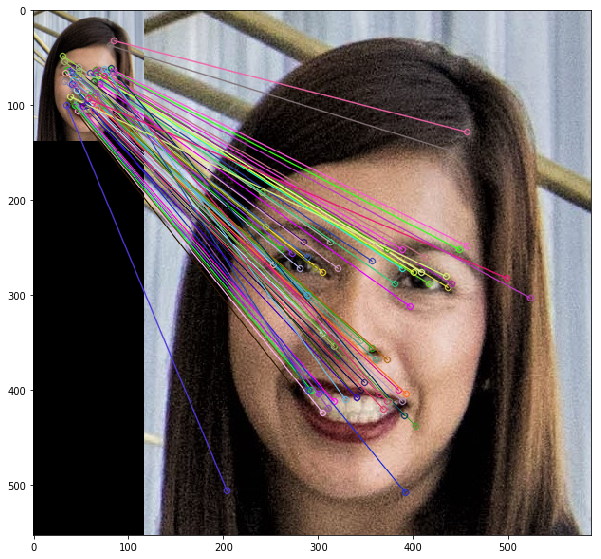

((( Rotational Invariance )))
number of keypoints in train image is : 819
number of test keypoints is : 833
number of matched keypoints is : 651


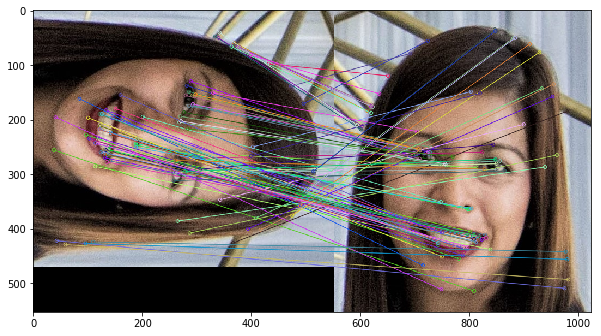

((( Illumination Invariance )))
number of keypoints in train image is : 819
number of test keypoints is : 842
number of matched keypoints is : 478


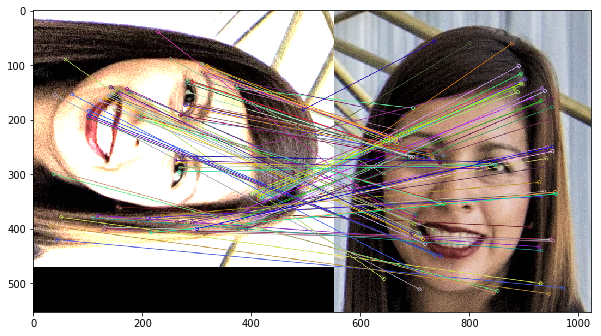

((( Noise Invariance )))
number of keypoints in train image is : 819
number of test keypoints is : 878
number of matched keypoints is : 317


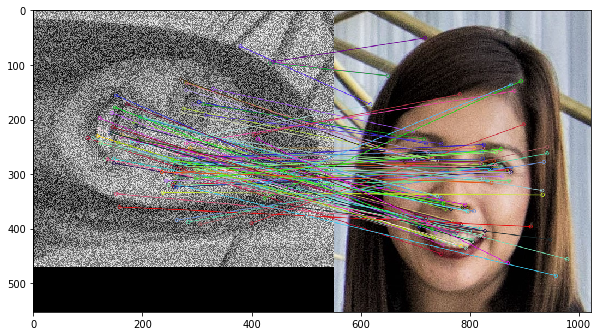

In [65]:
for i in pro:
    print("(((",i,")))")
    img = images_dic[i]
    match_fn(img)